In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["toy", "mnist", "spam"]:
        data = np.load(f"data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "training_data", "training_labels", "test_data"
        for field in fields:
            print(field, data[field].shape)



loaded toy data!
training_data (1000, 2)
training_labels (1000,)
test_data (0,)

loaded mnist data!
training_data (60000, 1, 28, 28)
training_labels (60000,)
test_data (10000, 1, 28, 28)

loaded spam data!
training_data (4171, 32)
training_labels (4171,)
test_data (1000, 32)


In [2]:
#q2e
def plot_data_points(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

def plot_decision_boundary(w, b):
    x = np.linspace(-5, 5, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y, 'k')

def plot_margins(w, b):
    w

In [3]:
#q3a

mnist_data = np.load("data/mnist-data.npz")
spam_data = np.load("data/spam-data.npz")
print("before process")
print("MNIST Training Data Shape:", mnist_data["training_data"].shape)
print("MNIST Training Label Shape:", mnist_data["training_labels"].shape)
print("SPAM Training Data Shape:", spam_data["training_data"].shape)
print("SPAM Training Label Shape:", spam_data["training_labels"].shape) 

def shuffle_partition_MNIST(data):
    training_data = data["training_data"].reshape(-1, 28 * 28)
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    validation_data = combined_data[:10000, :-1]  
    validation_labels = combined_data[:10000, -1]  
    training_data = combined_data[10000:, :-1]  
    training_labels = combined_data[10000:, -1]  

    return validation_data, validation_labels, training_data, training_labels

def shuffle_partition_SPAM(data):
    training_data = data["training_data"]
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    index = int(0.2 * len(combined_data))
    training_data = combined_data[:index, :-1]
    training_labels = combined_data[:index, -1]
    validation_data = combined_data[index:, :-1]
    validation_labels = combined_data[index:, -1]
    return validation_data, validation_labels, training_data, training_labels

mnist_validation_data, mnist_validation_labels, mnist_training_data, mnist_training_labels = shuffle_partition_MNIST(mnist_data)
spam_validation_data, spam_validation_labels, spam_training_data, spam_training_labels = shuffle_partition_SPAM(spam_data)  
print("after process") 
print("MNIST Training Data Shape:", mnist_training_data.shape)
print("MNIST Validation Data Shape:", mnist_validation_data.shape)
print("SPAM Training Data Shape:", spam_training_data.shape)
print("SPAM Validation Data Shape:", spam_validation_data.shape) 


before process
MNIST Training Data Shape: (60000, 1, 28, 28)
MNIST Training Label Shape: (60000,)
SPAM Training Data Shape: (4171, 32)
SPAM Training Label Shape: (4171,)
after process
MNIST Training Data Shape: (50000, 784)
MNIST Validation Data Shape: (10000, 784)
SPAM Training Data Shape: (834, 32)
SPAM Validation Data Shape: (3337, 32)


In [4]:

#q3b
def accuracy_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Compare true labels with predicted labels
    correct_predictions = (y_true == y_pred)
    
    # Calculate accuracy
    accuracy = np.sum(correct_predictions) / len(y_true)
    return accuracy


Training size: 100, Train Accuracy: 1.00000, Validation Accuracy: 0.74440
Training size: 200, Train Accuracy: 1.00000, Validation Accuracy: 0.79520
Training size: 500, Train Accuracy: 1.00000, Validation Accuracy: 0.85710
Training size: 1000, Train Accuracy: 1.00000, Validation Accuracy: 0.86710
Training size: 2000, Train Accuracy: 1.00000, Validation Accuracy: 0.88960
Training size: 5000, Train Accuracy: 1.00000, Validation Accuracy: 0.90070
Training size: 10000, Train Accuracy: 1.00000, Validation Accuracy: 0.90630


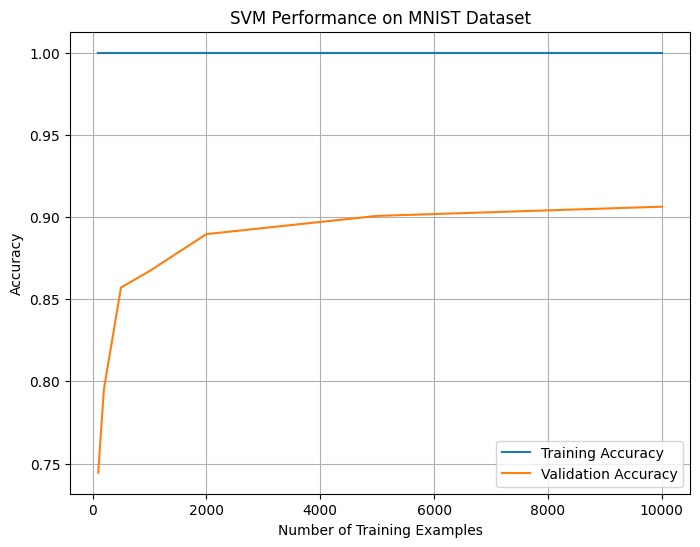

Training size: 100, Train Accuracy: 0.83000, Validation Accuracy: 0.78873
Training size: 200, Train Accuracy: 0.84000, Validation Accuracy: 0.76386
Training size: 500, Train Accuracy: 0.80400, Validation Accuracy: 0.78873
Training size: 1000, Train Accuracy: 0.81415, Validation Accuracy: 0.79113
Training size: 2000, Train Accuracy: 0.81415, Validation Accuracy: 0.79113
Training size: 834, Train Accuracy: 0.81415, Validation Accuracy: 0.79113


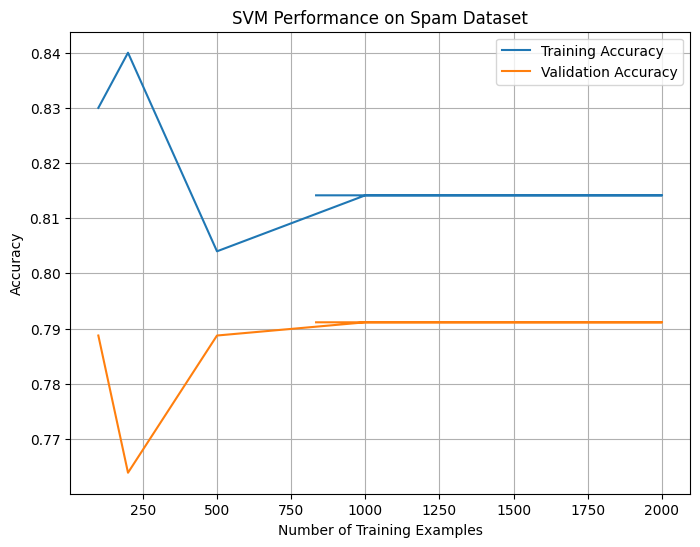

In [5]:
#q4
from sklearn.svm import SVC
def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, train_sizes, name):
    training_accuracies = []
    validation_accuracies = []
    for size in train_sizes:
        model = SVC(kernel='linear')
        training_data_subset = training_data[:size]
        training_labels_subset = training_labels[:size]

        model.fit(training_data_subset, training_labels_subset)
        train_predictions = model.predict(training_data_subset)
        train_accuracy = accuracy_score(training_labels_subset, train_predictions)
        training_accuracies.append(train_accuracy)

        validation_predictions = model.predict(validation_data)
        validation_accuracy = accuracy_score(validation_labels, validation_predictions)
        validation_accuracies.append(validation_accuracy)
        
        print(f"Training size: {size}, Train Accuracy: {train_accuracy:.5f}, Validation Accuracy: {validation_accuracy:.5f}")

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, training_accuracies, label="Training Accuracy")
    plt.plot(train_sizes, validation_accuracies, label="Validation Accuracy")
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Accuracy")
    plt.title(f"SVM Performance on {name} Dataset")
    plt.legend()
    plt.grid()
    plt.show()
    
# Example usage for MNIST
train_sizes_mnist = [100, 200, 500, 1000, 2000, 5000, 10000]
train_and_evaluate_svm(
    mnist_training_data, mnist_training_labels,
    mnist_validation_data, mnist_validation_labels,
    train_sizes_mnist, "MNIST"
)

# Example usage for Spam
train_sizes_spam = [100, 200, 500, 1000, 2000, len(spam_training_data)]
train_and_evaluate_svm(
    spam_training_data, spam_training_labels,
    spam_validation_data, spam_validation_labels,
    train_sizes_spam, "Spam"
)

C: 1e-10, Training Accuracy: 0.1122, Validation Accuracy: 0.1126
C: 1e-08, Training Accuracy: 0.9024, Validation Accuracy: 0.8861
C: 1e-06, Training Accuracy: 0.9668, Validation Accuracy: 0.9260
C: 0.0001, Training Accuracy: 1.0000, Validation Accuracy: 0.9063
C: 0.01, Training Accuracy: 1.0000, Validation Accuracy: 0.9063
C: 10, Training Accuracy: 1.0000, Validation Accuracy: 0.9063
C: 1000, Training Accuracy: 1.0000, Validation Accuracy: 0.9063
C: 100000, Training Accuracy: 1.0000, Validation Accuracy: 0.9063
Best C: 1e-06, Best Validation Accuracy: 0.9260


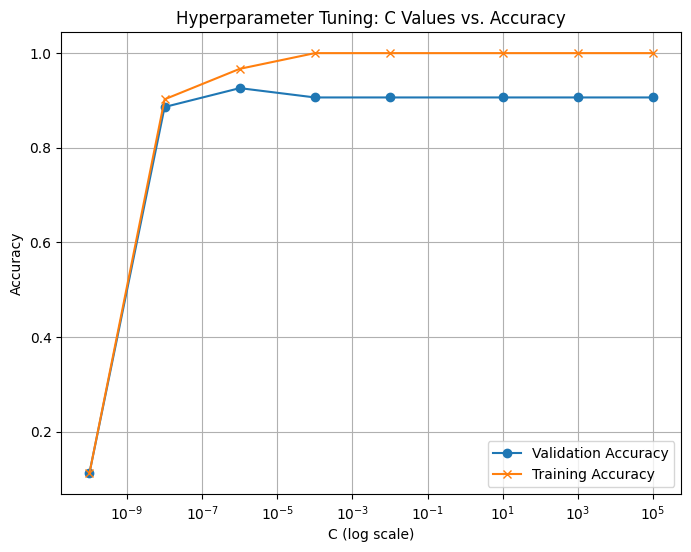

In [6]:
#Q5
C_values = [0.0000000001, 0.00000001, 0.000001, 0.0001, 0.01, 10, 1000, 100000]

validation_accuracies = []
training_accuracies = []

training_data = mnist_training_data[:10000]
training_labels = mnist_training_labels[:10000]

for c in C_values:
    model = SVC(kernel='linear', C=c)
    model.fit(training_data, training_labels)
    train_pred = model.predict(training_data)
    train_acc = accuracy_score(training_labels, train_pred)
    training_accuracies.append(train_acc)
    
    validation_predictions = model.predict(mnist_validation_data)
    validation_accuracy = accuracy_score(mnist_validation_labels, validation_predictions)
    validation_accuracies.append(validation_accuracy)

        
    print(f"C: {c}, Training Accuracy: {train_acc:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

best_C = C_values[np.argmax(validation_accuracies)]
best_val_accuracy = max(validation_accuracies)

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(C_values, validation_accuracies, label='Validation Accuracy', marker='o')
plt.plot(C_values, training_accuracies, label='Training Accuracy', marker='x')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning: C Values vs. Accuracy')
plt.legend()
plt.grid()
plt.show()


In [7]:
def k_fold_cross_validation(data, labels, C_values, k=5):
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    fold_size = len(data) // k
    fold_indices = [
        (np.concatenate([np.arange(0, i * fold_size), np.arange((i + 1) * fold_size, len(data))]),
         np.arange(i * fold_size, (i + 1) * fold_size))
        for i in range(k)
    ]

    avg_validation_accuracies = []

    for c in C_values:
        validation_accuracies = []

        for train_idx, val_idx in fold_indices:
            train_data, val_data = data[train_idx], data[val_idx]
            train_labels, val_labels = labels[train_idx], labels[val_idx]

            model = SVC(kernel='linear', C=c)
            model.fit(train_data, train_labels)

            val_predictions = model.predict(val_data)
            val_accuracy = accuracy_score(val_labels, val_predictions)
            validation_accuracies.append(val_accuracy)


        avg_validation_accuracy = np.mean(validation_accuracies)
        avg_validation_accuracies.append(avg_validation_accuracy)
        print(f"C: {c}, Average Validation Accuracy: {avg_validation_accuracy:.5f}")

    best_C_index = np.argmax(avg_validation_accuracies)
    best_C = C_values[best_C_index]
    best_validation_accuracy = avg_validation_accuracies[best_C_index]

    print(f"\nBest C: {best_C}, Best Average Validation Accuracy: {best_validation_accuracy:.5f}")
    return best_C, best_validation_accuracy


spam_data = np.load("data/spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"]
C_values = [1e-8, 1e-5, 1e-3, 0.01, 0.1, 1, 10, 100]


best_C, best_validation_accuracy = k_fold_cross_validation(training_data, training_labels, C_values)

C: 1e-08, Average Validation Accuracy: 0.71223
C: 1e-05, Average Validation Accuracy: 0.71223
C: 0.001, Average Validation Accuracy: 0.74964
C: 0.01, Average Validation Accuracy: 0.77578
C: 0.1, Average Validation Accuracy: 0.79568
C: 1, Average Validation Accuracy: 0.80120
C: 10, Average Validation Accuracy: 0.80336
C: 100, Average Validation Accuracy: 0.80216

Best C: 10, Best Average Validation Accuracy: 0.80336


In [8]:
import pandas as pd
def results_to_csv(y_test, file_name):
    y_test = y_test.astype(int)  
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  
    df.to_csv(file_name, index_label='Id')

In [11]:
best_C = 1e-06
mnist_test_data = mnist_data["test_data"].reshape(-1, 28 * 28)
model = SVC(kernel='linear', C=best_C)
model.fit(mnist_training_data, mnist_training_labels)
mnist_test_predictions = model.predict(mnist_test_data)
results_to_csv(mnist_test_predictions, "mnist_submission.csv")

In [19]:
def k_fold_validation_with_fixed_C(data, labels, k, fixed_C):
    fold_size = len(data) // k
    accuracies = []

    for i in range(k):
        # Create train-validation split for the current fold
        val_start = i * fold_size
        val_end = (i + 1) * fold_size if i != k - 1 else len(data)
        
        validation_data = data[val_start:val_end]
        validation_labels = labels[val_start:val_end]

        training_data = np.concatenate((data[:val_start], data[val_end:]), axis=0)
        training_labels = np.concatenate((labels[:val_start], labels[val_end:]), axis=0)

        # Train the model with fixed C
        model = SVC(kernel='linear', C=fixed_C)
        model.fit(training_data, training_labels)

        # Validate the model
        predictions = model.predict(validation_data)
        accuracy = np.mean(predictions == validation_labels)
        accuracies.append(accuracy)

        print(f"Fold {i + 1}, Validation Accuracy: {accuracy:.5f}")

    # Average accuracy across all folds
    avg_accuracy = np.mean(accuracies)
    print(f"Average Validation Accuracy with C={fixed_C}: {avg_accuracy:.5f}")
    return avg_accuracy

k = 5  # Number of folds
spam_training_labels = spam_training_labels.flatten()  # Ensure labels are 1D
fixed_C = 10

# Run k-fold validation
average_accuracy = k_fold_validation_with_fixed_C(spam_training_data, spam_training_labels, k, fixed_C)

# Retrain the final model on the entire training set with C=10
final_spam_model = SVC(kernel='linear', C=fixed_C)
final_spam_model.fit(spam_training_data, spam_training_labels)

# Make predictions on the test set
spam_test_predictions = final_spam_model.predict(spam_data["test_data"])

# Save predictions to CSV
results_to_csv(spam_test_predictions, "spam_submission.csv")

Fold 1, Validation Accuracy: 0.78916
Fold 2, Validation Accuracy: 0.81325
Fold 3, Validation Accuracy: 0.78916
Fold 4, Validation Accuracy: 0.80120
Fold 5, Validation Accuracy: 0.82941
Average Validation Accuracy with C=10: 0.80444
